# Assignment 1 #
Name: Maya Murad
<br>
Student Number: 250850926

## 1 Refreshing Mathematics ##
### (a) ###
$$
f(w) = w^Tx \\
f(w) = \begin{bmatrix} w_1 & w_2 & w_3 & \dots & w_n \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n \end{bmatrix} \\
f(w) = w_1 x_1 + w_2 x_2 + w_3 x_3 + \dots + w_n x_n \\~\\

\text{The derivative with respect to w is:} \\ 
= x_1 + x_2 + x_3 + \dots + x_n \\~\\
\text{Therefore:} \\
\nabla f(w) = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n \end{bmatrix} \\ 
\nabla f(w) = x \\
$$

### (b) ###
$$
f(w) = tr(ww^TA) = tr(w^TAw) \\
f(w) = tr( \begin{bmatrix} w_1 & w_2 & w_3 & \dots & w_n \end{bmatrix} 
    \begin{bmatrix} a_{11} & \dots & a_{1n} \\ \vdots & \ddots & \vdots \\ a_{n1} & \dots & a_{nn} \end{bmatrix}
    \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_n \end{bmatrix} ) \\
f(w) = \sum_{i=1}^{n} w_i^2 \sum_{j=1}^n a_{ij} \\~\\
\text{Finding the derivative, we get:} \\
\nabla f(w) = \begin{bmatrix} 
2w_1 \sum_{i=1}^n a_{j1} \\ 
2w_2 \sum_{i=1}^n a_{j1} \\ 
2w_3 \sum_{i=1}^n a_{j1} \\ 
\vdots \\ 
2w_n \sum_{i=1}^n a_{jn} 
\end{bmatrix} \\
$$

### (c) ###
$$
f(w) = tr(ww^TA) = tr(w^TAw) = \sum_{i=1}^{n} w_i^2 \sum_{j=1}^n a_{ij} \\
\text{Therefore:} \\
H = \begin{bmatrix} 2 \sum_{j=1}^n a_{j1} & 0 & 0 \\ 0 & \ddots & 0 \\ 0 & 0 & 2 \sum_{j=1}^n a_{jn} \end{bmatrix} \\
$$

### (d) ###
$$
\text{Considering that:} \\
w^T(x) = \sum_{i=1}^n w_i x_1 \\
\text{and} \\
\sigma(x) = (1 + e^{-x})^{-1} \\~\\
\text{We get:} \\
f(w) = log(\sigma (w^Tx)) = log(((1+e \sum_{i=1}^n w_i x_i))^{-1}) = -log(1 + e \sum_{i=1}^n w_i x_i) \\~\\
\text{Therefore:} \\
\nabla f(w) = \begin{bmatrix}
-(1+e \sum_{i=1}^n w_i x_i)^{-1} & (\sum_{i=1}^n w_i x_i)x_1 \\
-(1+e \sum_{i=1}^n w_i x_i)^{-1} & (\sum_{i=1}^n w_i x_i)x_2 \\
-(1+e \sum_{i=1}^n w_i x_i)^{-1} & (\sum_{i=1}^n w_i x_i)x_3 \\
\vdots \\
-(1+e \sum_{i=1}^n w_i x_i)^{-1} & (\sum_{i=1}^n w_i x_i)x_n \end{bmatrix}
$$



## 2 Linear and Polynomial Regression

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

### (a) ###

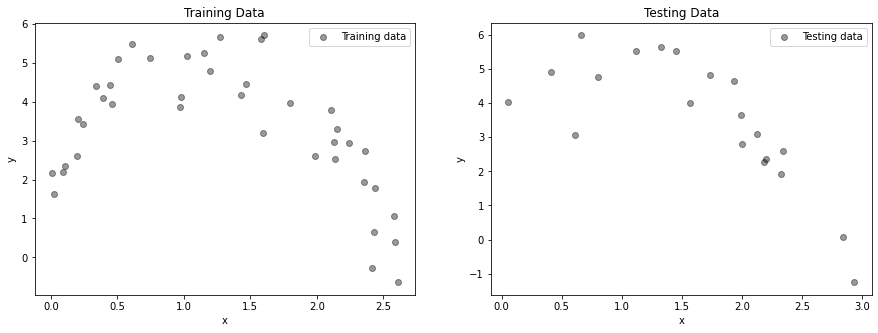

In [2]:
xtr = np.loadtxt("hw1xtr.dat", unpack=True) # x training data
ytr = np.loadtxt("hw1ytr.dat", unpack=True) # y training data
xte = np.loadtxt("hw1xte.dat", unpack=True) # x testing data
yte = np.loadtxt("hw1yte.dat", unpack=True) # y testing data

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper right')
ax.set_title('Training Data')

ax2.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc='upper right')
ax2.set_title('Testing Data')

plt.show()

### (b) & (c) ###

The average error on the training set is:  2.1739455790492586
The average error on the testing set is:  2.3118753456727994


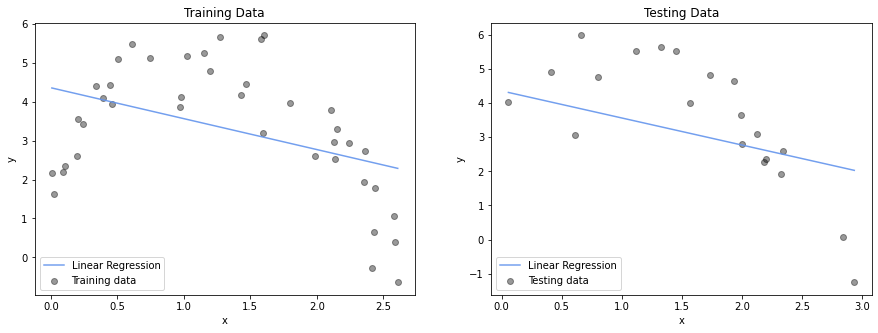

In [10]:
# Calculate weight vector
def weight_vector(X, y_data):
    XX = matrix_power((np.dot(np.transpose(X), X)), -1)
    XXX = np.dot(XX, np.transpose(X))
    weight = np.dot(XXX, y_data)

    return weight

# Calculate the predictions for the graph
def graph_line(x_data, weight):
    x = np.c_[np.ones(100), np.linspace(x_data.min(), x_data.max(), 100)] # Get equally spaced data for a smoother line
    prediction = (np.dot(x, weight))

    return (x, prediction)

# Calculate the average error
def average_error(X, weight, y_data):
    prediction = (np.dot(X, weight))
    sum = np.sum(np.square(np.subtract(prediction, y_data)))
    avg_error = (1/y_data.size) * sum
    
    return avg_error

# Getting variables
X = np.c_[np.ones(xtr.size), xtr]
weight = weight_vector(X, ytr)
x1_tr, prediction1_tr = graph_line(xtr, weight)

# Print average error (Training data)
print('The average error on the training set is: ', average_error(X, weight, ytr))

# Getting variables
X = np.c_[np.ones(xte.size), xte]
x1_te, prediction1_te = graph_line(xte, weight)

# Print average error (Testing data)
print('The average error on the testing set is: ', average_error(X, weight, yte))

# Plot
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax.plot(x1_tr[:, 1], prediction1_tr, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')
ax.set_title('Training Data')

ax2.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax2.plot(x1_te[:, 1], prediction1_te, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc='lower left')
ax2.set_title('Testing Data')

plt.show()


### (d) ###

The average error on the training set is:  0.484684503127155
The average error on the testing set is:  0.7573635655517963

The training and test error are both lower than those for linear regression, indicating that 2nd-order polynomial regression gives a better fit.



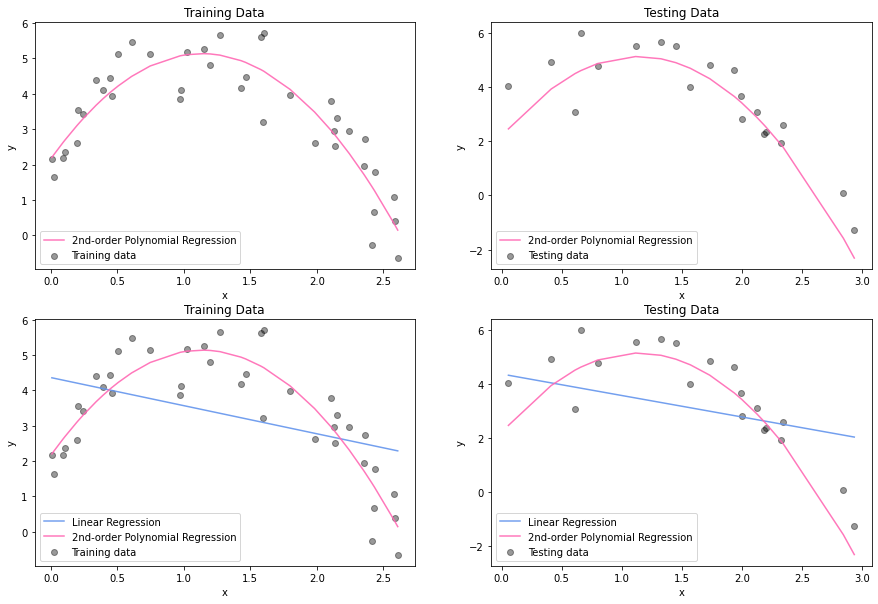

In [4]:
# TRAINING DATA 2ND-ORDER POLYNOMIAL REGRESSION 

# Make design matrix
x2 = np.power(xtr, 2)
X = np.c_[np.ones(xtr.size), xtr, x2] 

# Get weights
weight = weight_vector(X, ytr) 

# Sort the design matrix for a smooth curve and get the y predictions
x2_tr = X[X[:,1].argsort()] 
prediction2_tr = (np.dot(x2_tr, weight))

# Print average error
print('The average error on the training set is: ', average_error(X, weight, ytr))

# TESTING DATA 2ND-ORDER POLYNOMIAL REGRESSION 

# Make design matrix
x2 = np.power(xte, 2)
X = np.c_[np.ones(xte.size), xte, x2] 

# Sort the design matrix for a smooth curve and get the y predictions
x2_te = X[X[:,1].argsort()] 
prediction2_te = (np.dot(x2_te, weight))

# Print average error
print('The average error on the testing set is: ', average_error(X, weight, yte))

# QUESTION ANSWER:
print('\033[1m' + '\nThe training and test error are both lower than those for linear regression, indicating that 2nd-order polynomial regression gives a better fit.\n')

# Plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax.plot(x2_tr[:, 1], prediction2_tr, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')
ax.set_title('Training Data')

ax2.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax2.plot(x2_te[:, 1], prediction2_te, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc='lower left')
ax2.set_title('Testing Data')

ax3.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax3.plot(x1_tr[:, 1], prediction1_tr, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax3.plot(x2_tr[:, 1], prediction2_tr, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend(loc='lower left')
ax3.set_title('Training Data')

ax4.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax4.plot(x1_te[:, 1], prediction1_te, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax4.plot(x2_te[:, 1], prediction2_te, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.legend(loc='lower left')
ax4.set_title('Testing Data')

plt.show()


### (e) ###

The average error on the training set is:  0.4805521334453257
The average error on the testing set is:  0.6911245362888412

The training and test error are both lower than those for linear regression and 2nd-order polynomial regression, indicating that 3rd-order polynomial regression gives a better fit.



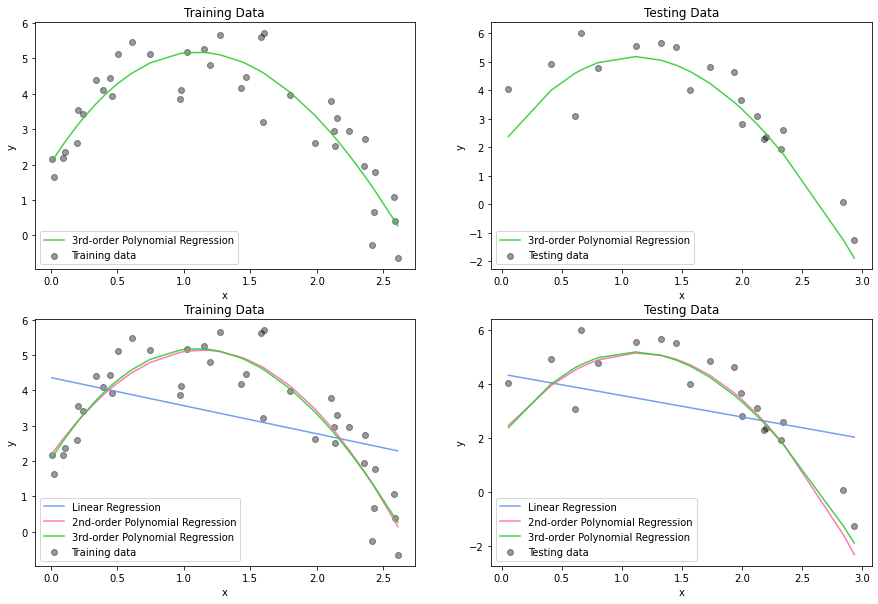

In [5]:
# TRAINING DATA 3RD-ORDER POLYNOMIAL REGRESSION 

# Make design matrix
x2 = np.power(xtr, 2)
x3 = np.power(xtr, 3)
X = np.c_[np.ones(xtr.size), xtr, x2, x3] 

# Get weights
weight = weight_vector(X, ytr) 

# Sort the design matrix for a smooth curve and get the y predictions
x3_tr = X[X[:,1].argsort()] 
prediction3_tr = (np.dot(x3_tr, weight))

# Print average error
print('The average error on the training set is: ', average_error(X, weight, ytr))

# TESTING DATA 3RD-ORDER POLYNOMIAL REGRESSION 

# Make design matrix
x2 = np.power(xte, 2)
x3 = np.power(xte, 3)
X = np.c_[np.ones(xte.size), xte, x2, x3] 

# Sort the design matrix for a smooth curve and get the y predictions
x3_te = X[X[:,1].argsort()] 
prediction3_te = (np.dot(x3_te, weight))

# Print average error
print('The average error on the testing set is: ', average_error(X, weight, yte))

# QUESTION ANSWER:
print('\033[1m' + '\nThe training and test error are both lower than those for linear regression and 2nd-order polynomial regression, indicating that 3rd-order polynomial regression gives a better fit.\n')

# Plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax.plot(x3_tr[:, 1], prediction3_tr, color='limegreen', label='3rd-order Polynomial Regression', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')
ax.set_title('Training Data')

ax2.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax2.plot(x3_te[:, 1], prediction3_te, color='limegreen', label='3rd-order Polynomial Regression', alpha=0.9)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc='lower left')
ax2.set_title('Testing Data')

ax3.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax3.plot(x1_tr[:, 1], prediction1_tr, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax3.plot(x2_tr[:, 1], prediction2_tr, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax3.plot(x3_tr[:, 1], prediction3_tr, color='limegreen', label='3rd-order Polynomial Regression', alpha=0.9)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend(loc='lower left')
ax3.set_title('Training Data')

ax4.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax4.plot(x1_te[:, 1], prediction1_te, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax4.plot(x2_te[:, 1], prediction2_te, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax4.plot(x3_te[:, 1], prediction3_te, color='limegreen', label='3rd-order Polynomial Regression', alpha=0.9)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.legend(loc='lower left')
ax4.set_title('Testing Data')

plt.show()


### (f) ###

The average error on the training set is:  0.43664763409971336
The average error on the testing set is:  1.5584694832255543

The training error is lower than 3rd-order polynomial regression, however the test error is much higher. This indicates that we are over-fitting the data, meaning that 3rd-order is the best for fitting the data.



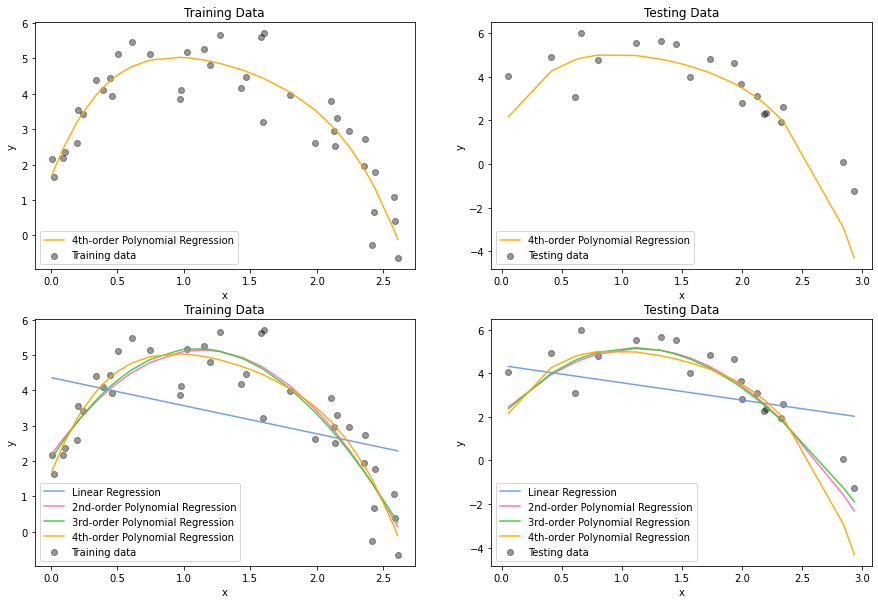

In [6]:
# TRAINING DATA 4th-ORDER POLYNOMIAL REGRESSION 

# Make design matrix
x2 = np.power(xtr, 2)
x3 = np.power(xtr, 3)
x4 = np.power(xtr, 4)
X_tr = np.c_[np.ones(xtr.size), xtr, x2, x3, x4] 

# Get weights
weight = weight_vector(X_tr, ytr) 

# Sort the design matrix for a smooth curve and get the y predictions
x4_tr = X_tr[X_tr[:,1].argsort()] 
prediction4_tr = (np.dot(x4_tr, weight))

# Print average error
print('The average error on the training set is: ', average_error(X_tr, weight, ytr))

# TESTING DATA 4th-ORDER POLYNOMIAL REGRESSION 

# Make design matrix
x2 = np.power(xte, 2)
x3 = np.power(xte, 3)
x4 = np.power(xte, 4)
X_te = np.c_[np.ones(xte.size), xte, x2, x3, x4] 

# Sort the design matrix for a smooth curve and get the y predictions
x4_te = X_te[X_te[:,1].argsort()] 
prediction4_te = (np.dot(x4_te, weight))

# Print average error
print('The average error on the testing set is: ', average_error(X_te, weight, yte))

# QUESTION ANSWER:
print('\033[1m' + '\nThe training error is lower than 3rd-order polynomial regression, however the test error is much higher. This indicates that we are over-fitting the data, meaning that 3rd-order is the best for fitting the data.\n')

# Plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax.plot(x4_tr[:, 1], prediction4_tr, color='orange', label='4th-order Polynomial Regression', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')
ax.set_title('Training Data')

ax2.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax2.plot(x4_te[:, 1], prediction4_te, color='orange', label='4th-order Polynomial Regression', alpha=0.9)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc='lower left')
ax2.set_title('Testing Data')

ax3.scatter(xtr, ytr, label='Training data', alpha=0.4, color='black')
ax3.plot(x1_tr[:, 1], prediction1_tr, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax3.plot(x2_tr[:, 1], prediction2_tr, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax3.plot(x3_tr[:, 1], prediction3_tr, color='limegreen', label='3rd-order Polynomial Regression', alpha=0.9)
ax3.plot(x4_tr[:, 1], prediction4_tr, color='orange', label='4th-order Polynomial Regression', alpha=0.9)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend(loc='lower left')
ax3.set_title('Training Data')

ax4.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax4.plot(x1_te[:, 1], prediction1_te, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax4.plot(x2_te[:, 1], prediction2_te, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax4.plot(x3_te[:, 1], prediction3_te, color='limegreen', label='3rd-order Polynomial Regression', alpha=0.9)
ax4.plot(x4_te[:, 1], prediction4_te, color='orange', label='4th-order Polynomial Regression', alpha=0.9)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.legend(loc='lower left')
ax4.set_title('Testing Data')

plt.show()



## 3 Regularization and Cross-Validation ##
### (a) ###


The training error for lambda = 0.01 is the lowest, and it increases as lambda increases. However, the testing error for lambda = 0.1 is lower than that of lambda = 0.01. This indicates that we are overfitting the data when lambda = 0.01. Therefore, lambda = 0.1 is the best for fitting the data.



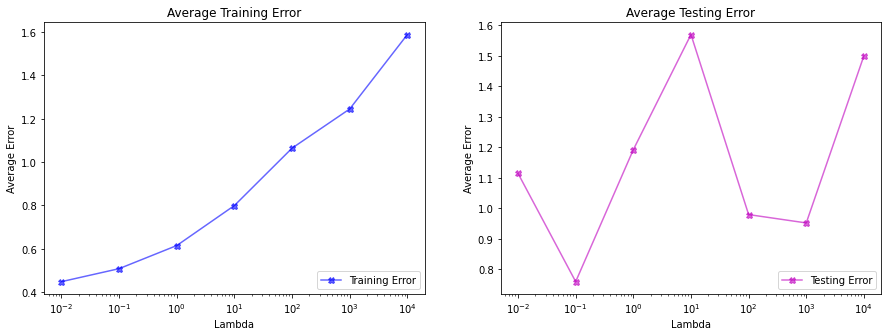

In [7]:
# Get weight
def get_weight(X, y, lamb):
    a = matrix_power(np.add(np.dot(np.transpose(X), X), lamb * identity), -1)
    b = np.dot(np.transpose(X), y)
    w = np.dot(a, b)

    return w

# Calculate the average error
def average_error(X, weight, y_data):
    prediction = (np.dot(X, weight))
    sum = np.sum(np.square(np.subtract(prediction, y_data)))
    avg_error = (1/y_data.size) * sum
    
    return avg_error

lamb = np.array([0, 0.01, 0.1, 1, 10, 100, 1000, 10000])
identity = np.identity(5)
identity[0, 0] = 0
train_errors = np.zeros(8)
test_errors = np.zeros(8)
weights = []

for i in range(0, lamb.size):
    w = get_weight(X_tr, ytr, lamb[i])
    weights.append(w)
    train_errors[i] = average_error(X_tr, w, ytr)
    test_errors[i] = average_error(X_te, w, yte)

# QUESTION ANSWER:
print('\033[1m' + '\nThe training error for lambda = 0.01 is the lowest, and it increases as lambda increases. However, the testing error for lambda = 0.1 is lower than that of lambda = 0.01. This indicates that we are overfitting the data when lambda = 0.01. Therefore, lambda = 0.1 is the best for fitting the data.\n')

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(lamb[1:], train_errors[1:], 'bX-', label='Training Error', alpha=0.6)
ax.set_xlabel('Lambda')
ax.set_ylabel('Average Error')
ax.legend(loc='lower right')
ax.set_title('Average Training Error')
ax.set_xscale('log')

ax2.plot(lamb[1:], test_errors[1:], 'mX-', label='Testing Error', alpha=0.6)
ax2.set_xlabel('Lambda')
ax2.set_ylabel('Average Error')
ax2.legend(loc='lower right')
ax2.set_title('Average Testing Error')
ax2.set_xscale('log')

plt.show()



### (b) ###

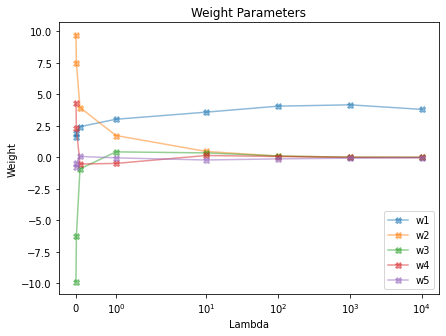

In [8]:


weights = np.asarray(weights)
w = np.transpose(weights)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)

ax.plot(lamb, w[0], 'X-', label='w1', alpha=0.5)
ax.plot(lamb, w[1], 'X-', label='w2', alpha=0.5)
ax.plot(lamb, w[2], 'X-', label='w3', alpha=0.5)
ax.plot(lamb, w[3], 'X-', label='w4', alpha=0.5)
ax.plot(lamb, w[4], 'X-', label='w5', alpha=0.5)
ax.set_xlabel('Lambda')
ax.set_ylabel('Weight')
ax.legend(loc='lower right')
ax.set_title('Weight Parameters')
ax.set_xscale('symlog')

plt.show()

### (c) ###


5-Fold cross validation indicates that lambda = 0.01 provides the best fit, which is not the same as (a).



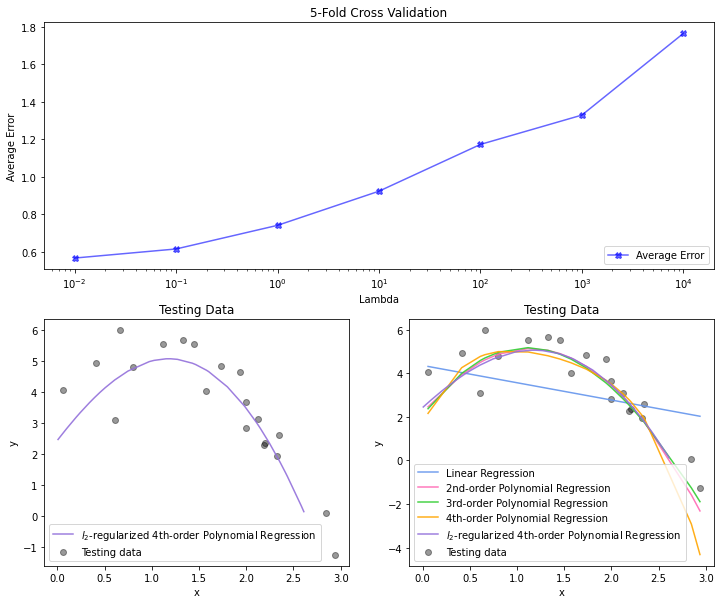

In [9]:
Xtr = xtr.reshape(-1, 1)
y = ytr

# Do 5-Fold cross validation
model = Ridge()
poly = PolynomialFeatures(4)
X = poly.fit_transform(Xtr)
lambda_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid = GridSearchCV(model, lambda_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X, y)
scores = grid.cv_results_['mean_test_score']
scores = scores * -1

x = X_tr[X_tr[:,1].argsort()] 
prediction = (np.dot(x, weights[2]))

# QUESTION ANSWER:
print('\033[1m' + '\n5-Fold cross validation indicates that lambda = 0.01 provides the best fit, which is not the same as (a).\n')

# Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax.plot(lamb[1:], scores, 'bX-', label='Average Error', alpha=0.6)
ax.set_xlabel('Lambda')
ax.set_ylabel('Average Error')
ax.legend(loc='lower right')
ax.set_title('5-Fold Cross Validation')
ax.set_xscale('log')

ax2.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax2.plot(x[:, 1], prediction, color='mediumpurple', label='$l_2$-regularized 4th-order Polynomial Regression', alpha=0.9)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc='lower left')
ax2.set_title('Testing Data')

ax3.scatter(xte, yte, label='Testing data', alpha=0.4, color='black')
ax3.plot(x1_te[:, 1], prediction1_te, color='cornflowerblue', label='Linear Regression', alpha=0.9)
ax3.plot(x2_te[:, 1], prediction2_te, color='hotpink', label='2nd-order Polynomial Regression', alpha=0.9)
ax3.plot(x3_te[:, 1], prediction3_te, color='limegreen', label='3rd-order Polynomial Regression', alpha=0.9)
ax3.plot(x4_te[:, 1], prediction4_te, color='orange', label='4th-order Polynomial Regression', alpha=0.9)
ax3.plot(x[:, 1], prediction, color='mediumpurple', label='$l_2$-regularized 4th-order Polynomial Regression', alpha=0.9)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend(loc='lower left')
ax3.set_title('Testing Data')

plt.show()


